**Load the Dataset**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1/housing.csv")
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


**Handle Missing Values**

In [6]:
# Check for missing values
print(data.isnull().sum())

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# For non-numeric columns, you can use the mode (most frequent value)
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data.isnull().sum())  # Verify missing values are handled


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<ipython-input-6-93622958c4c8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


**New Features**

In [7]:
# Feature engineering: adding synthetic features
data['crime_rate'] = np.random.uniform(0, 1, len(data))
data['proximity_to_schools'] = np.random.randint(1, 5, len(data))

print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   crime_rate  proximity_to_schools  
0    0.312439                 

**Convert Categorical Columns**

In [8]:
# Convert categorical columns to numerical (e.g., ocean_proximity)
data = pd.get_dummies(data, drop_first=True)

print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  crime_rate  \
0       322.0       126.0         8.3252            452600.0    0.312439   
1      2401.0      1138.0         8.3014            358500.0    0.933678   
2       496.0       177.0         7.2574            352100.0    0.021385   
3       558.0       219.0         5.6431            341300.0    0.466533   
4       565.0       259.0         3.8462            342200.0    0.595343   

   proximity_to_schools  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                

**Split the Data**

In [9]:
from sklearn.model_selection import train_test_split

# Define target and features
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(16512, 14) (4128, 14)


**Train Models**

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)

# LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_mse = mean_squared_error(y_test, lgb_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"LightGBM MSE: {lgb_mse}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2104
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 13
[LightGBM] [Info] Start training from score 207194.693738
Random Forest MSE: 2459821935.4179916
XGBoost MSE: 2280865803.796083
LightGBM MSE: 2278808383.8037357


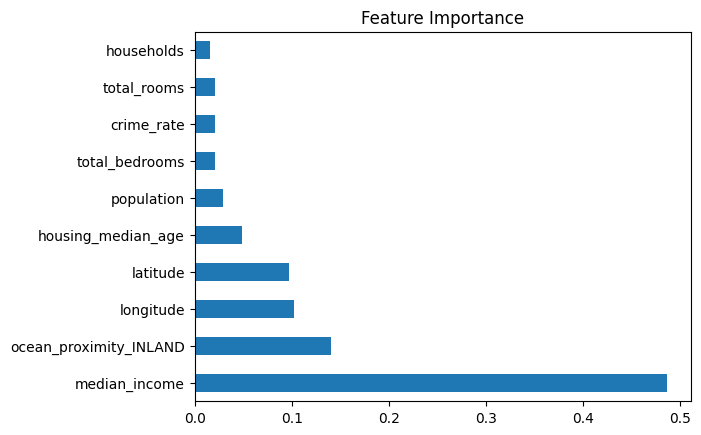

In [11]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


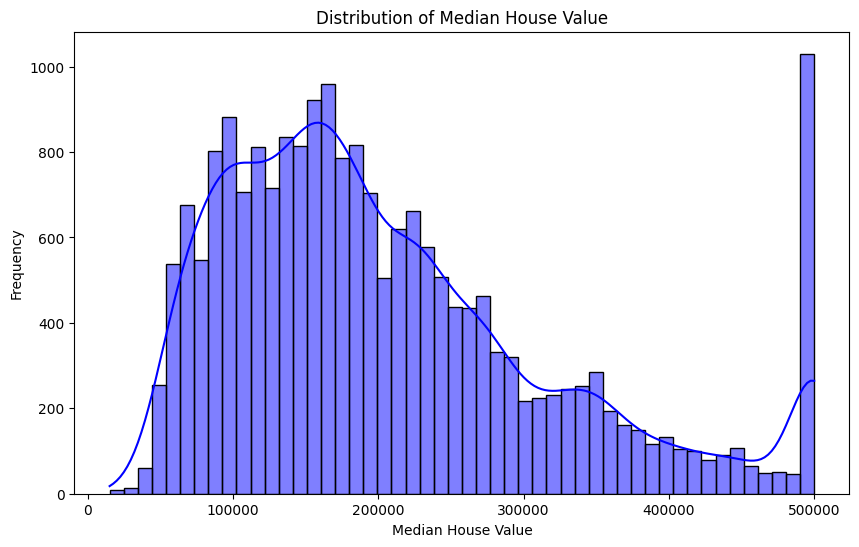

In [12]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], kde=True, bins=50, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


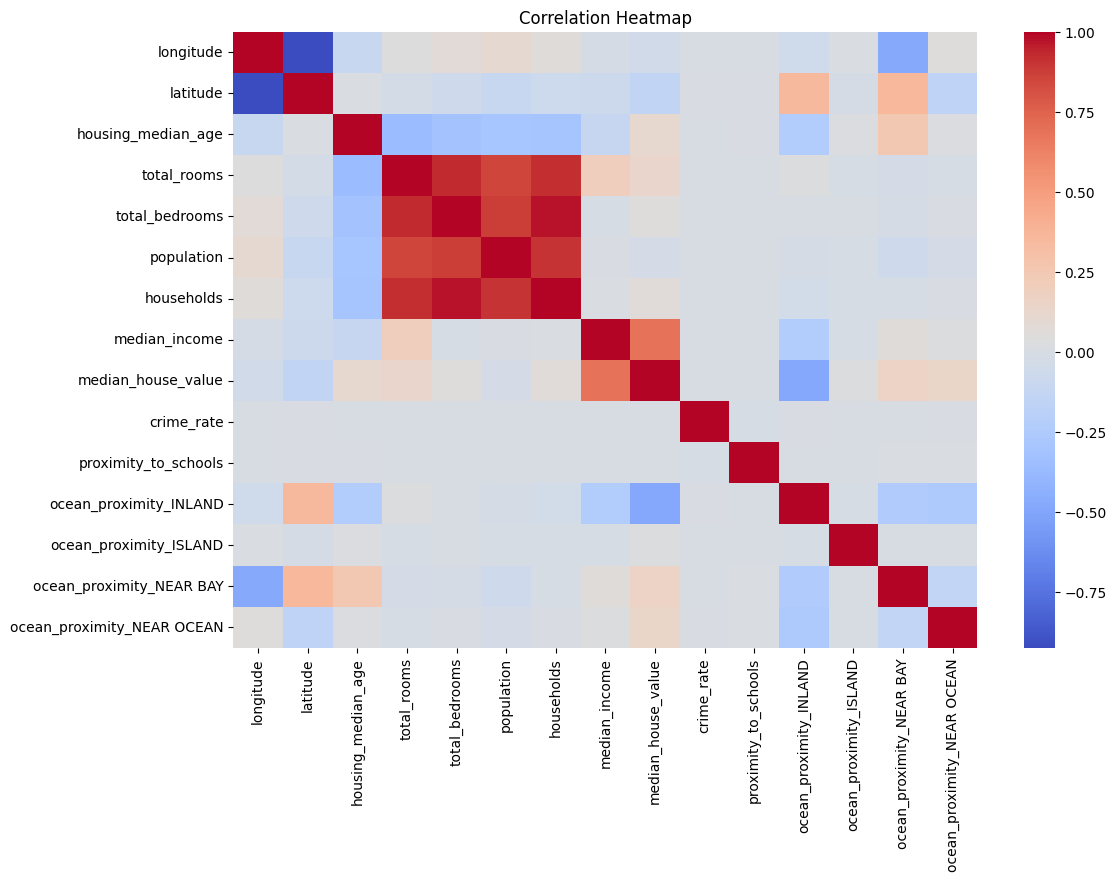

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

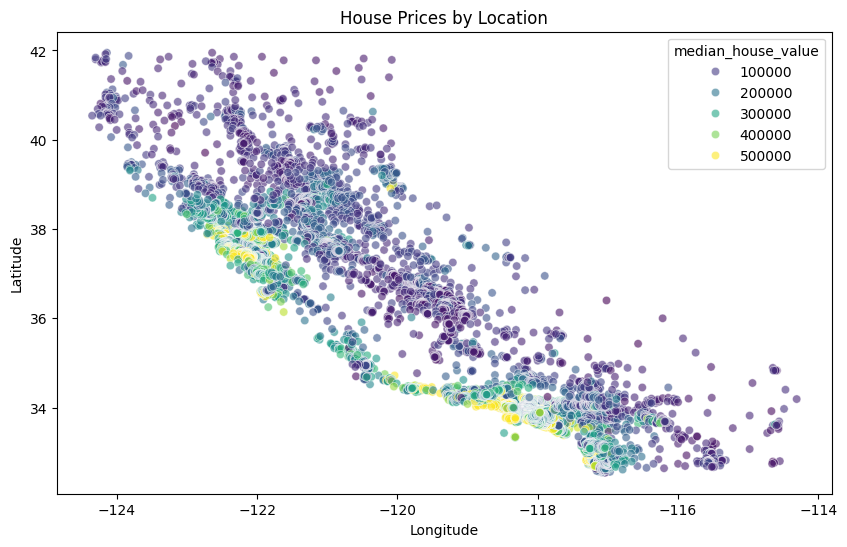

In [15]:
# Scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='median_house_value', palette='viridis', alpha=0.6)
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='House Value')
plt.show()
